<a href="https://colab.research.google.com/github/roboy88/protective-collar-options-strategy/blob/main/protective_collar_options_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Net Cost = $4800.00
Break-even Price = $48.00


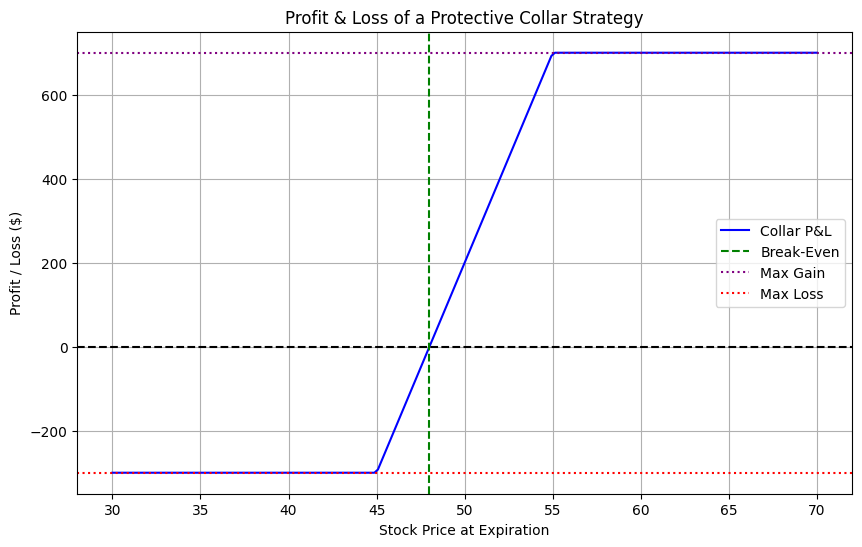

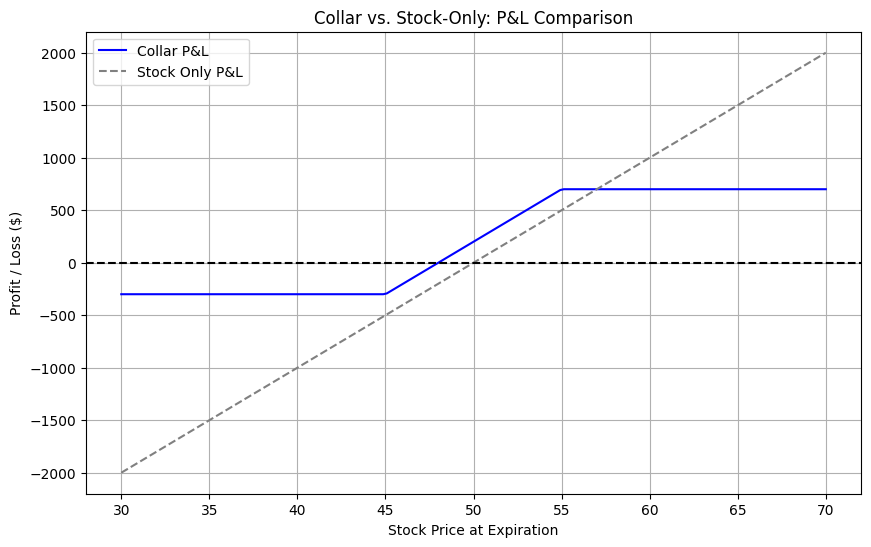

In [1]:
# === SETUP: LIBRARIES ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === STRATEGY PARAMETERS ===
stock_price = 50        # Current stock price
put_strike = 45         # Strike price of long put
call_strike = 55        # Strike price of short call
put_premium = 4         # Cost to buy the put
call_premium = 6        # Income from selling the call
shares = 100            # Number of shares

# === NET INVESTMENT & BREAK-EVEN ===
net_cost = (stock_price + put_premium - call_premium) * shares
breakeven_price = stock_price + put_premium - call_premium

print(f"Net Cost = ${net_cost:.2f}")
print(f"Break-even Price = ${breakeven_price:.2f}")

# === SIMULATE STOCK OUTCOMES ===
prices = np.linspace(30, 70, 200)  # Range of stock prices at expiration
collar_pnl = []

for p in prices:
    if p <= put_strike:
        proceeds = put_strike * shares
    elif p >= call_strike:
        proceeds = call_strike * shares
    else:
        proceeds = p * shares
    pnl = proceeds - net_cost
    collar_pnl.append(pnl)

# === PLOT: COLLAR STRATEGY ONLY ===
plt.figure(figsize=(10,6))
plt.plot(prices, collar_pnl, label="Collar P&L", color="blue")
plt.axhline(0, color='black', linestyle='--')
plt.axvline(breakeven_price, color='green', linestyle='--', label='Break-Even')
plt.axhline(max(collar_pnl), color='purple', linestyle=':', label='Max Gain')
plt.axhline(min(collar_pnl), color='red', linestyle=':', label='Max Loss')
plt.title("Profit & Loss of a Protective Collar Strategy")
plt.xlabel("Stock Price at Expiration")
plt.ylabel("Profit / Loss ($)")
plt.legend()
plt.grid(True)
plt.show()

# === COMPARE WITH STOCK-ONLY STRATEGY ===
stock_only_pnl = [(p * shares - stock_price * shares) for p in prices]

plt.figure(figsize=(10,6))
plt.plot(prices, collar_pnl, label="Collar P&L", color="blue")
plt.plot(prices, stock_only_pnl, label="Stock Only P&L", color="gray", linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.title("Collar vs. Stock-Only: P&L Comparison")
plt.xlabel("Stock Price at Expiration")
plt.ylabel("Profit / Loss ($)")
plt.legend()
plt.grid(True)
plt.show()
